In [22]:
import numpy as np
import torch 
# Example matrix
matrix_size = 100
A = np.random.rand(matrix_size, matrix_size)
data = np.load("/Users/dima/Documents/dpp4nlp/data/embeddings_tensor_50.npy")

In [23]:
def similarity(u, v):
    dot_product_uv = np.dot(u, v)
    norm_u = np.linalg.norm(u)
    norm_v = np.linalg.norm(v)
    
    similarity_uv = dot_product_uv / (norm_u * norm_v)
    return similarity_uv

def kernel_matrix(data):
    n = len(data)
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = similarity(data[i], data[j])
    return K

def select_eigenvectors(eigenvalues, eigenvectors):
    selected_eigenvalues = []
    selected_eigenvectors = []

    for eigenvalue, eigenvector in zip(eigenvalues, eigenvectors.T):
        prob = eigenvalue / (eigenvalue + 1)
        if np.random.rand() < prob:
            selected_eigenvalues.append(eigenvalue)
            selected_eigenvectors.append(eigenvector)
    
    return np.array(selected_eigenvalues), np.array(selected_eigenvectors).T


def select_items(eigenvectors, items):
    subset_Y = []

    for eigenvector in eigenvectors.T:
        # Calculate squared magnitude of components
        squared_magnitude = np.square(np.abs(eigenvector))

        # Normalize squared magnitudes to probabilities
        probabilities = squared_magnitude / np.sum(squared_magnitude)

        # Select an item based on probabilities
        selected_index = np.random.choice(len(eigenvector), p=probabilities)
        selected_item = items[selected_index]
        subset_Y.append(selected_item)
    
    return subset_Y

def probability_of_selection(K, Y):
    # Extract submatrix Ky
    Ky = K[Y][:, Y]
    
    # Compute determinants
    det_Ky = np.linalg.det(Ky)
    det_K_plus_I = np.linalg.det(K + np.eye(K.shape[0]))  # Adding identity matrix
    
    # Compute probability of selection
    probability = det_Ky / det_K_plus_I
    
    return probability


In [24]:
K = kernel_matrix(data)
eigenvalues, eigenvectors = np.linalg.eig(K)
selected_val, selected_vec = select_eigenvectors(eigenvalues, eigenvectors)
final_vecs = select_items(selected_vec, data)


In [25]:
len(final_vecs)

11

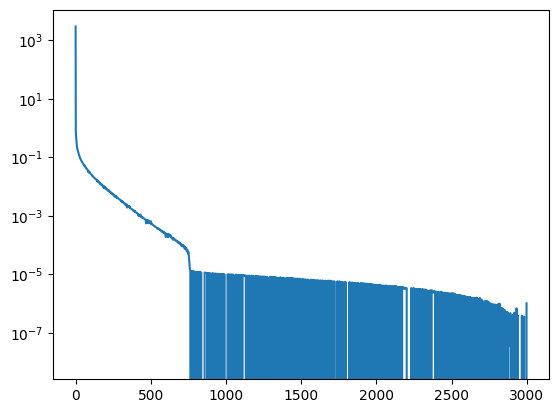

In [29]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.set_yscale('log')
plt.plot(eigenvalues)